C:\Users\isido\AppData\Local\Temp\ipykernel_12972\2247663204.py:18: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  gaussians = pd.DataFrame(np.random.multivariate_normal(np.zeros(5), cov, size=100000),


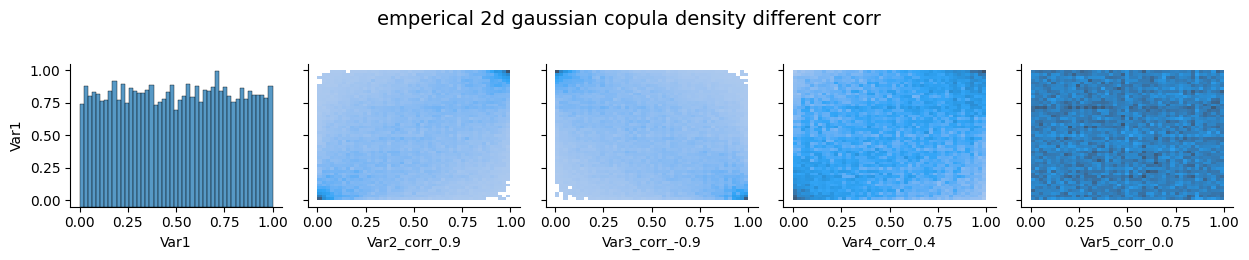

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF


# Define the extended covariance matrix
cov = np.array([
    [1.00, 0.9, -0.9, 0.4, 0.0],
    [0.9, 1.00, 0.0, 0.0, 0.0],
    [-0.9, 0.0, 1.00, 0.0, 0.0],
    [0.4, 0.0, 0.0, 1.00, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.00]
])

# Generate the Gaussian random variables
gaussians = pd.DataFrame(np.random.multivariate_normal(np.zeros(5), cov, size=100000), 
                         columns=['Var1', 'Var2_corr_0.9', 'Var3_corr_-0.9', 'Var4_corr_0.4', 'Var5_corr_0.0'])

ECDFs = gaussians.sample(10000).apply(ECDF, axis=0)
gaussians_transformed =gaussians.apply(lambda col: ECDFs[col.name](col))

# Create a pair plot of the first variable against the others
sns.pairplot(gaussians_transformed, y_vars=['Var1'], kind="hist")
plt.suptitle("emperical 2d gaussian copula density different corr", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()